In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import parallel_backend

In [3]:

# Load dataset
df = pd.read_csv("airbnb.csv") 

df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [5]:

# Data Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
# Handle missing values
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [9]:
# Feature Engineering
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['host_days_active'] = (pd.to_datetime("today") - df['host_since']).dt.days

C:\Users\mkadi\AppData\Local\Temp\ipykernel_1664\3442175733.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
C:\Users\mkadi\AppData\Local\Temp\ipykernel_1664\3442175733.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
C:\Users\mkadi\AppData\Local\Temp\ipykernel_1664\3442175733.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [11]:
# Select relevant features
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
            'number_of_reviews', 'host_days_active', 'latitude', 'longitude',
            'property_type', 'room_type', 'bed_type', 'cancellation_policy',
            'city', 'cleaning_fee']
target = 'log_price'

In [13]:

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
# Define transformations
num_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'host_days_active', 'latitude', 'longitude']
cat_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'cleaning_fee']

In [17]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [19]:
# Model Development
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [21]:
# Train Linear Regression Model
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression(n_jobs=-1))
])
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'review_scores_rating',
                                                   'number_of_reviews',
                                                   'host_days_active',
                                                   'latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy',
                                                   'city', 'cleaning_fee'])])),
                ('model', LinearRegression(n_jobs=-1))])

In [23]:
# Train Random Forest Model with Parallel Processing
with parallel_backend('threading'):
    rf_model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
    ])
    rf_model.fit(X_train, y_train)

C:\Users\mkadi\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

print("Linear Regression Performance:")
print(evaluate_model(lr_model, X_test, y_test))

Linear Regression Performance:
(0.46419896200348, 0.34919205230779266, 0.5805532153911557)


In [27]:
print("Random Forest Performance:")
print(evaluate_model(rf_model, X_test, y_test))

Random Forest Performance:
(0.39421866777257164, 0.28270274079888685, 0.6974877878393151)


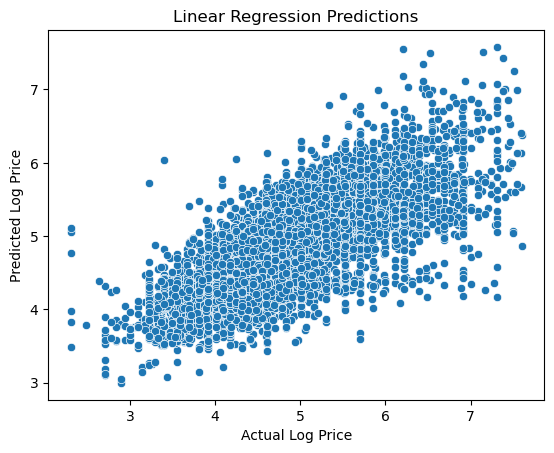

In [29]:
# Visualization
sns.scatterplot(x=y_test, y=lr_model.predict(X_test))
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Linear Regression Predictions")
plt.show()

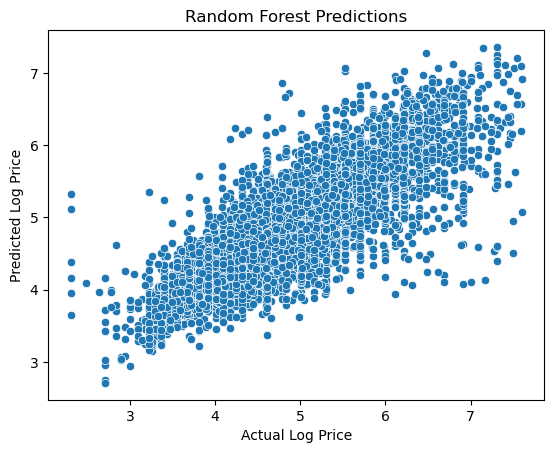

In [31]:
sns.scatterplot(x=y_test, y=rf_model.predict(X_test))
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Random Forest Predictions")
plt.show()